In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load CIFAR-10
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0


2025-06-25 11:08:52.583654: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750849732.627056     501 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750849732.643484     501 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
class_names = [
    'Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
    'Dog', 'Frog', 'Horse', 'Ship', 'Truck'
]


In [3]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
    # Add this block at the end of your conv layers
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.3),

])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-06-25 11:09:02.598735: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [9]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define EarlyStopping
early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=3,
    restore_best_weights=True
)

# Define data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    validation_split=0.2  # Important: add this
)

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Fit the model with augmentation and early stopping
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=64, subset='training'),
    validation_data=datagen.flow(x_train, y_train, batch_size=64, subset='validation'),
    epochs=50,
    callbacks=[early_stop]
)


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 74ms/step - accuracy: 0.6316 - loss: 1.0584 - val_accuracy: 0.6753 - val_loss: 0.9419
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 74ms/step - accuracy: 0.6508 - loss: 0.9978 - val_accuracy: 0.6852 - val_loss: 0.9175
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 74ms/step - accuracy: 0.6557 - loss: 0.9913 - val_accuracy: 0.6766 - val_loss: 0.9331
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 74ms/step - accuracy: 0.6654 - loss: 0.9562 - val_accuracy: 0.6813 - val_loss: 0.9046
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 74ms/step - accuracy: 0.6711 - loss: 0.9448 - val_accuracy: 0.6920 - val_loss: 0.8832
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 74ms/step - accuracy: 0.6804 - loss: 0.9208 - val_accuracy: 0.6848 - val_loss: 0.9010
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 74ms/step - accuracy: 0.6813 - loss: 0.9116 - val_accuracy: 0.6897 - val_loss: 0.8738
Epoch 8/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 74ms/step - accuracy: 0.6878 - loss: 0.8919 - val_accurac

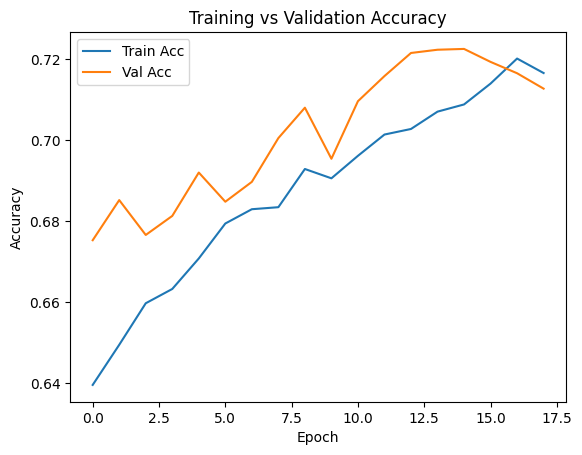

In [10]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [11]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7383 - loss: 0.7604
Test accuracy: 0.7399


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


/tmp/ipykernel_501/3175252892.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  true = class_names[int(true_labels[i])]


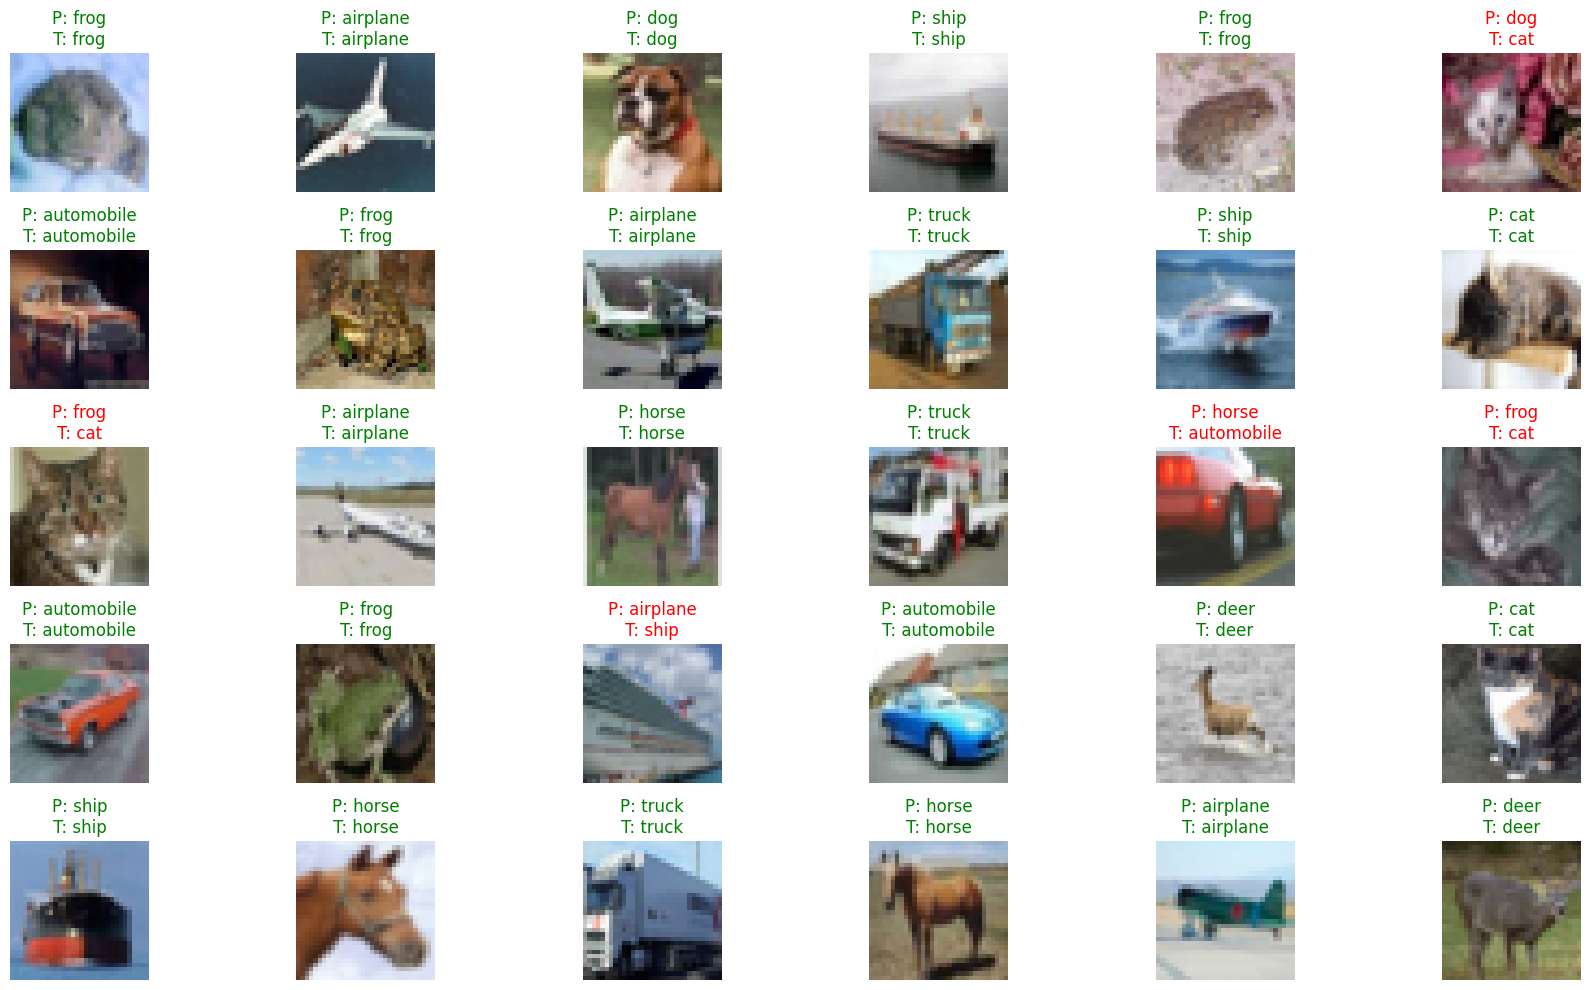

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# If y_test is one-hot encoded, convert it back to class indices
if len(y_test.shape) > 1 and y_test.shape[1] > 1:
    y_test_labels = np.argmax(y_test, axis=1)
else:
    y_test_labels = y_test  # already in integer format

# Class labels
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Get predictions
y_pred_probs = model.predict(x_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Pick some random samples
num_samples = 30
indices = np.random.choice(len(x_test), num_samples, replace=False)
images = x_test[indices]
true_labels = y_test_labels[indices]
predicted_labels = y_pred_classes[indices]

# Plot
plt.figure(figsize=(18, 10))
for i in range(num_samples):
    plt.subplot(5, 6, i+1)
    plt.imshow(images[i])
    plt.axis('off')
    true = class_names[int(true_labels[i])]
    pred = class_names[int(predicted_labels[i])]
    color = 'green' if true == pred else 'red'
    plt.title(f"P: {pred}\nT: {true}", color=color)
plt.tight_layout()
plt.show()
